# Subplots

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

#plt.subplot?

<IPython.core.display.Javascript object>


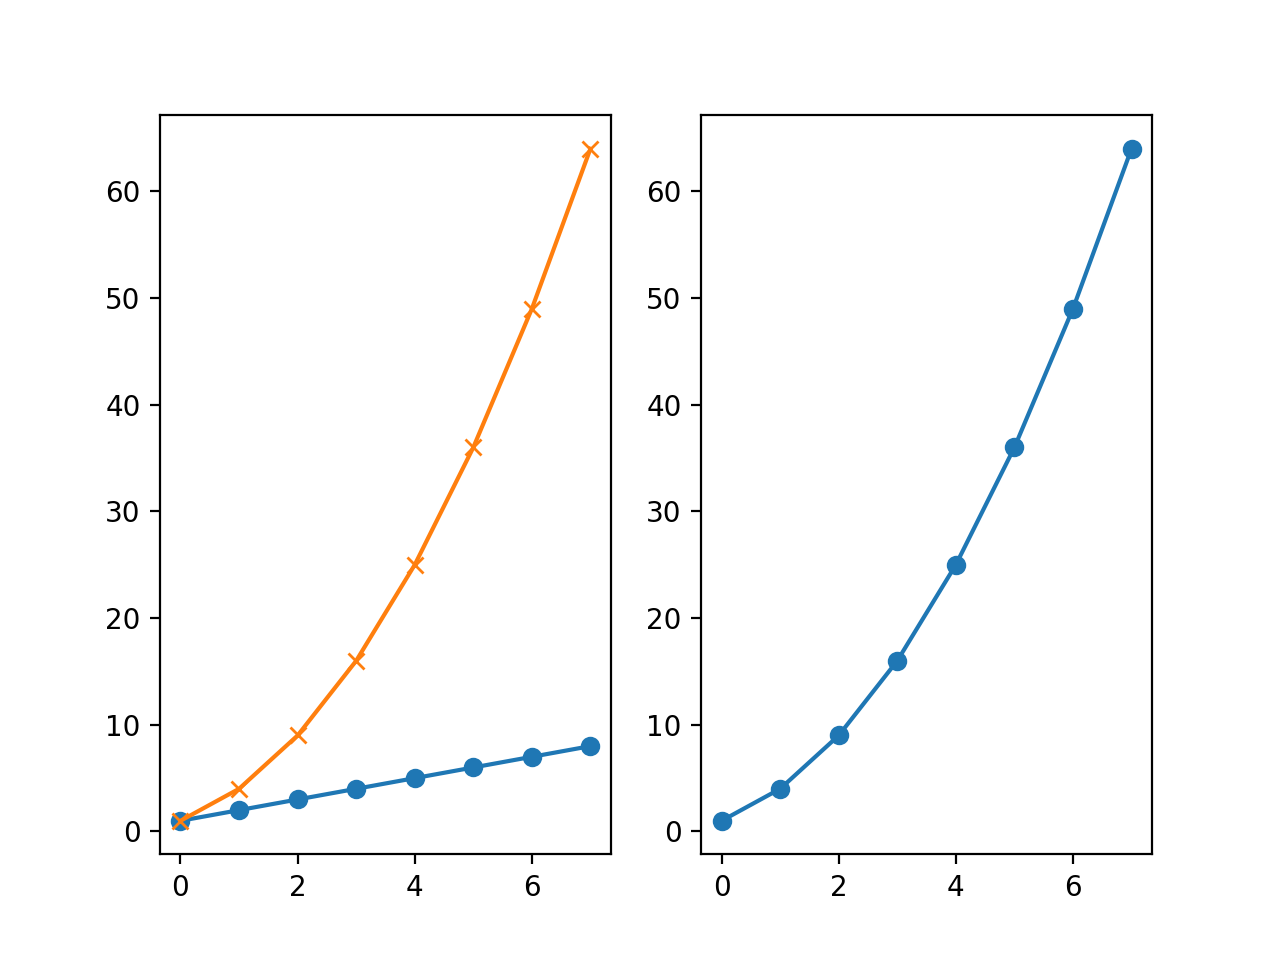

In [2]:
plt.figure()
# subplot with 1 row, 2 columns, and current axis is 1st subplot axes
plt.subplot(1, 2, 1)

linear_data = np.array([1,2,3,4,5,6,7,8])

plt.plot(linear_data, '-o')

In [3]:
exponential_data = linear_data**2 

# subplot with 1 row, 2 columns, and current axis is 2nd subplot axes
plt.subplot(1, 2, 2)
plt.plot(exponential_data, '-o')

In [4]:
# plot exponential data on 1st subplot axes
plt.subplot(1, 2, 1)
plt.plot(exponential_data, '-x')

<IPython.core.display.Javascript object>


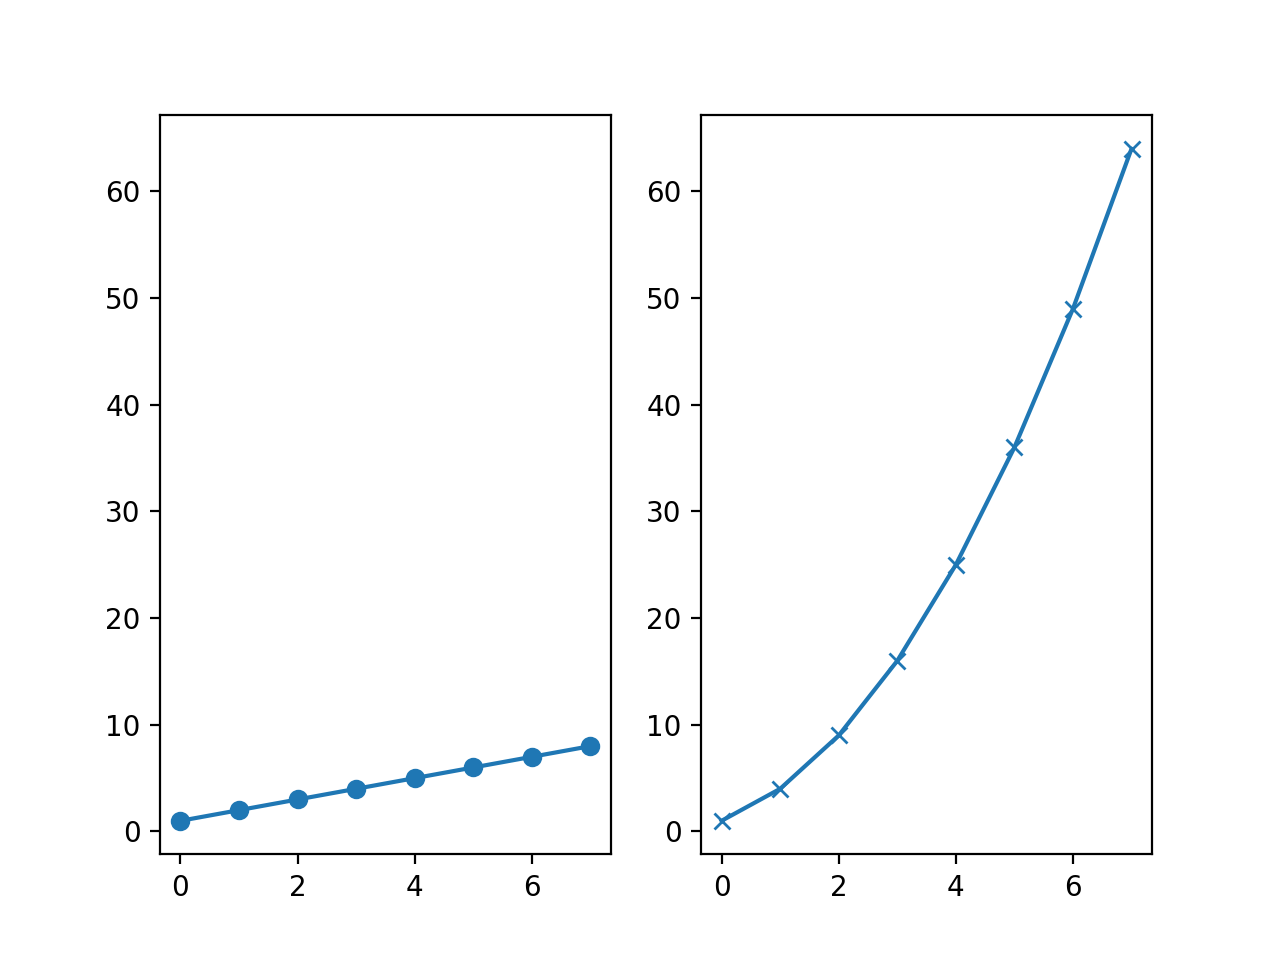

In [5]:
plt.figure()
ax1 = plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')
# pass sharey=ax1 to ensure the two subplots share the same y axis
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
plt.plot(exponential_data, '-x')

In [ ]:
plt.figure()
# the right hand side is equivalent shorthand syntax
plt.subplot(1,2,1) == plt.subplot(121)

<IPython.core.display.Javascript object>


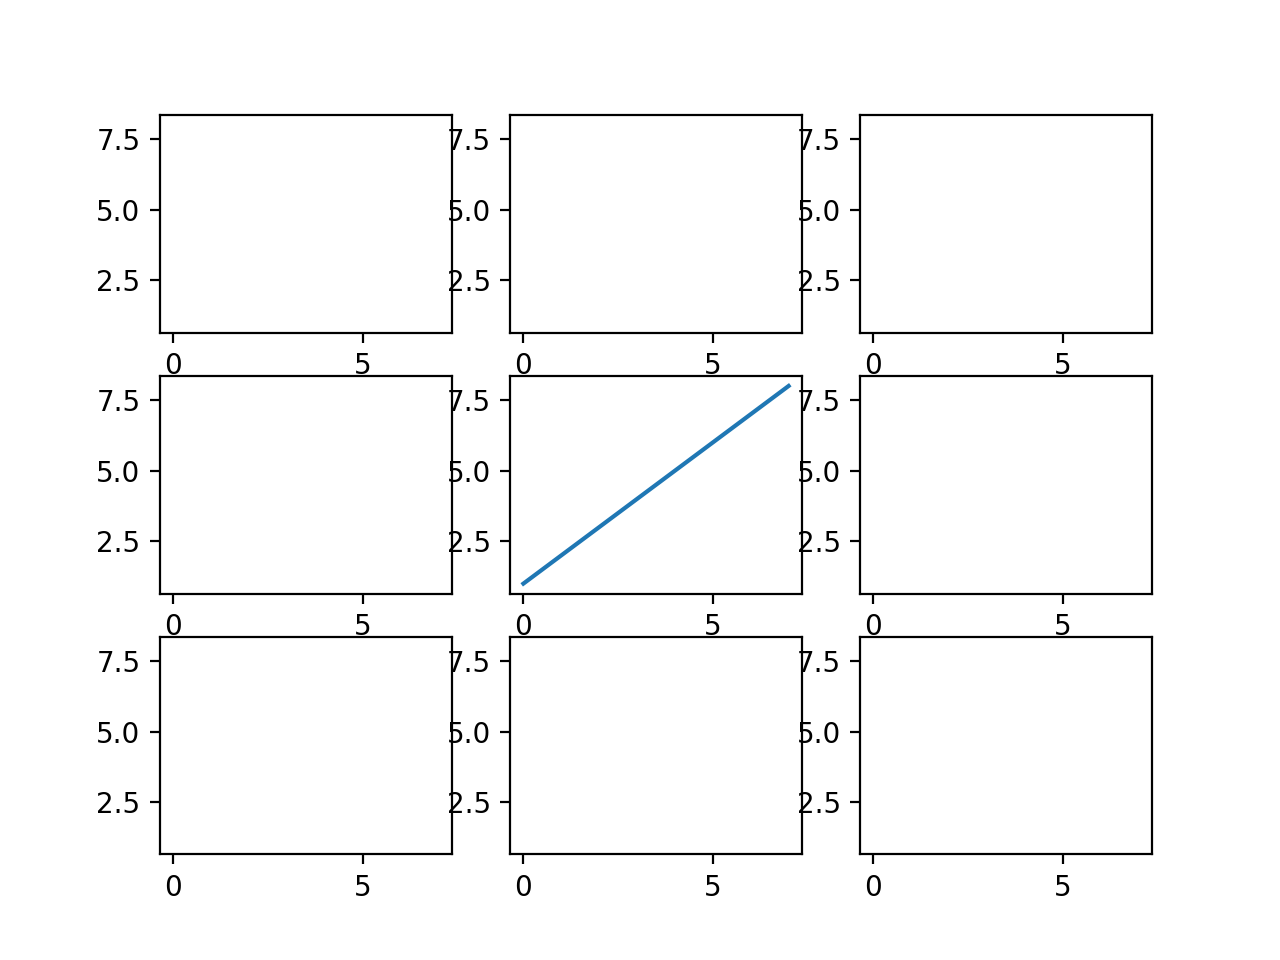

In [6]:
# create a 3x3 grid of subplots
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(3, 3, sharex=True, sharey=True)
# plot the linear_data on the 5th subplot axes 
ax5.plot(linear_data, '-')

In [7]:
# set inside tick labels to visible
for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(True)

In [8]:
# necessary on some systems to update the plot
plt.gcf().canvas.draw()

# Histograms

<IPython.core.display.Javascript object>


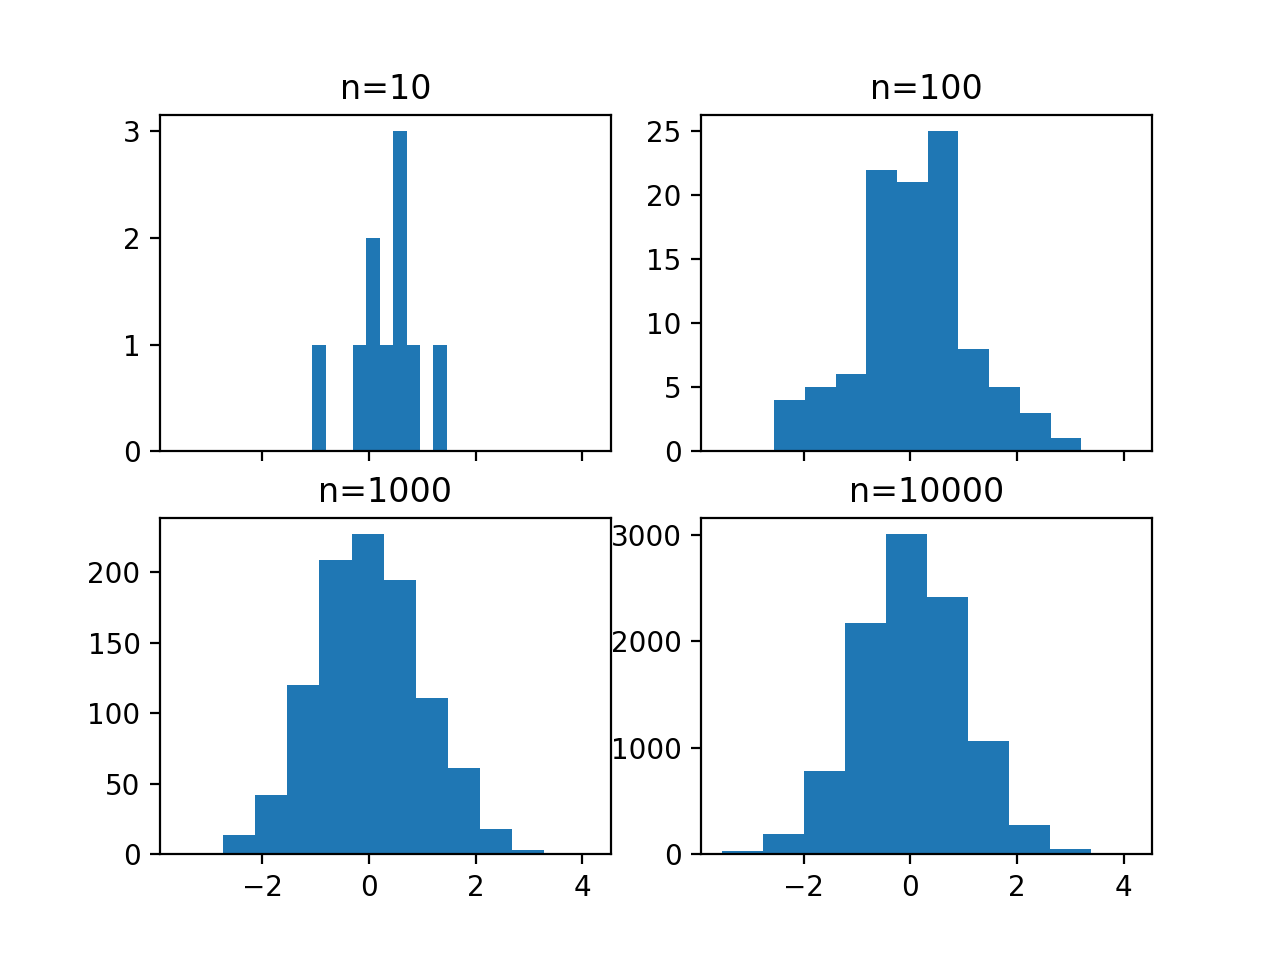

In [9]:
# create 2x2 grid of axis subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

# draw n = 10, 100, 1000, and 10000 samples from the normal distribution and plot corresponding histograms
for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


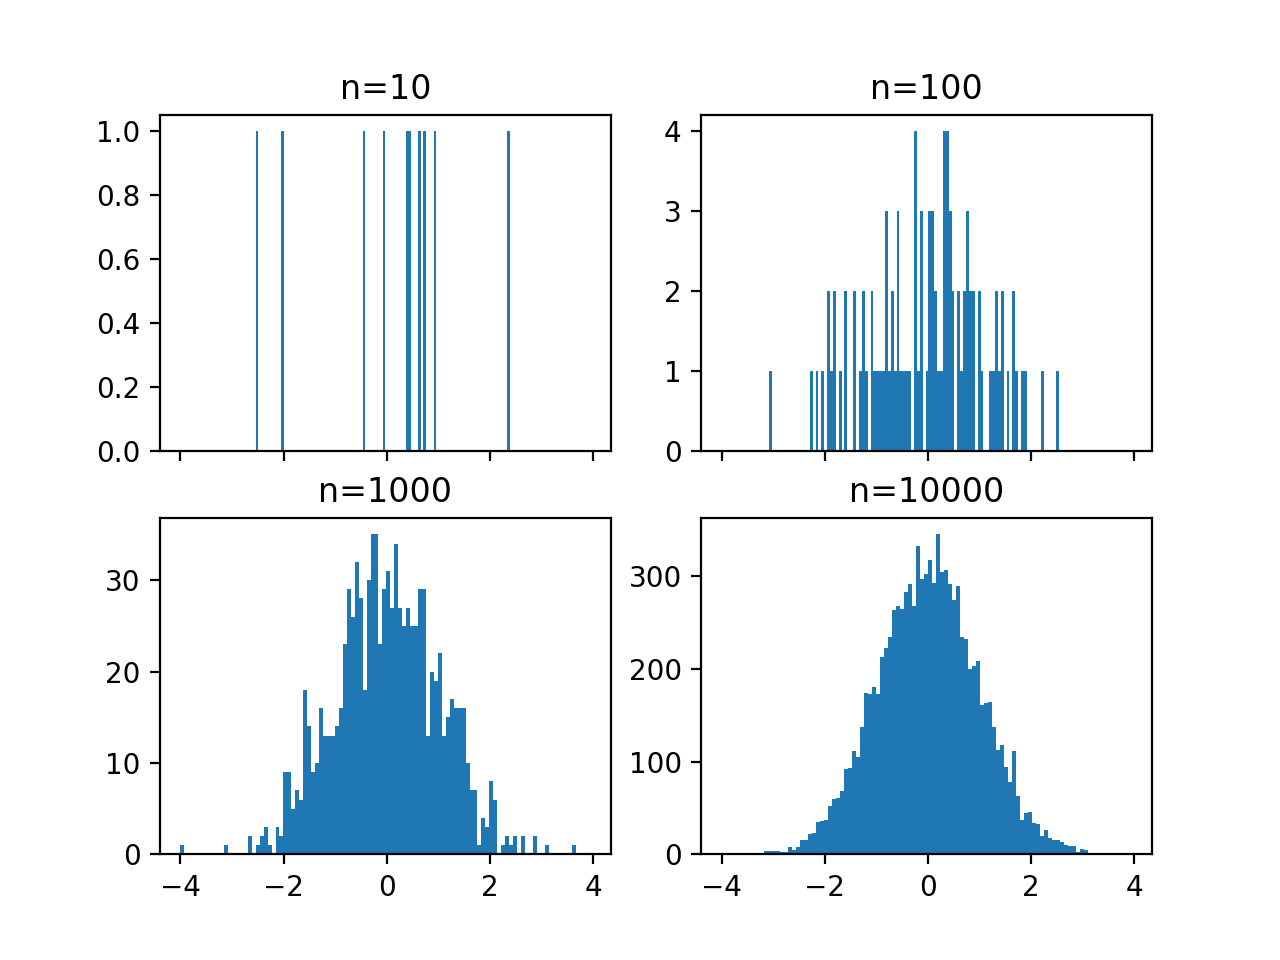

In [10]:
# repeat with number of bins set to 100
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample, bins=100)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


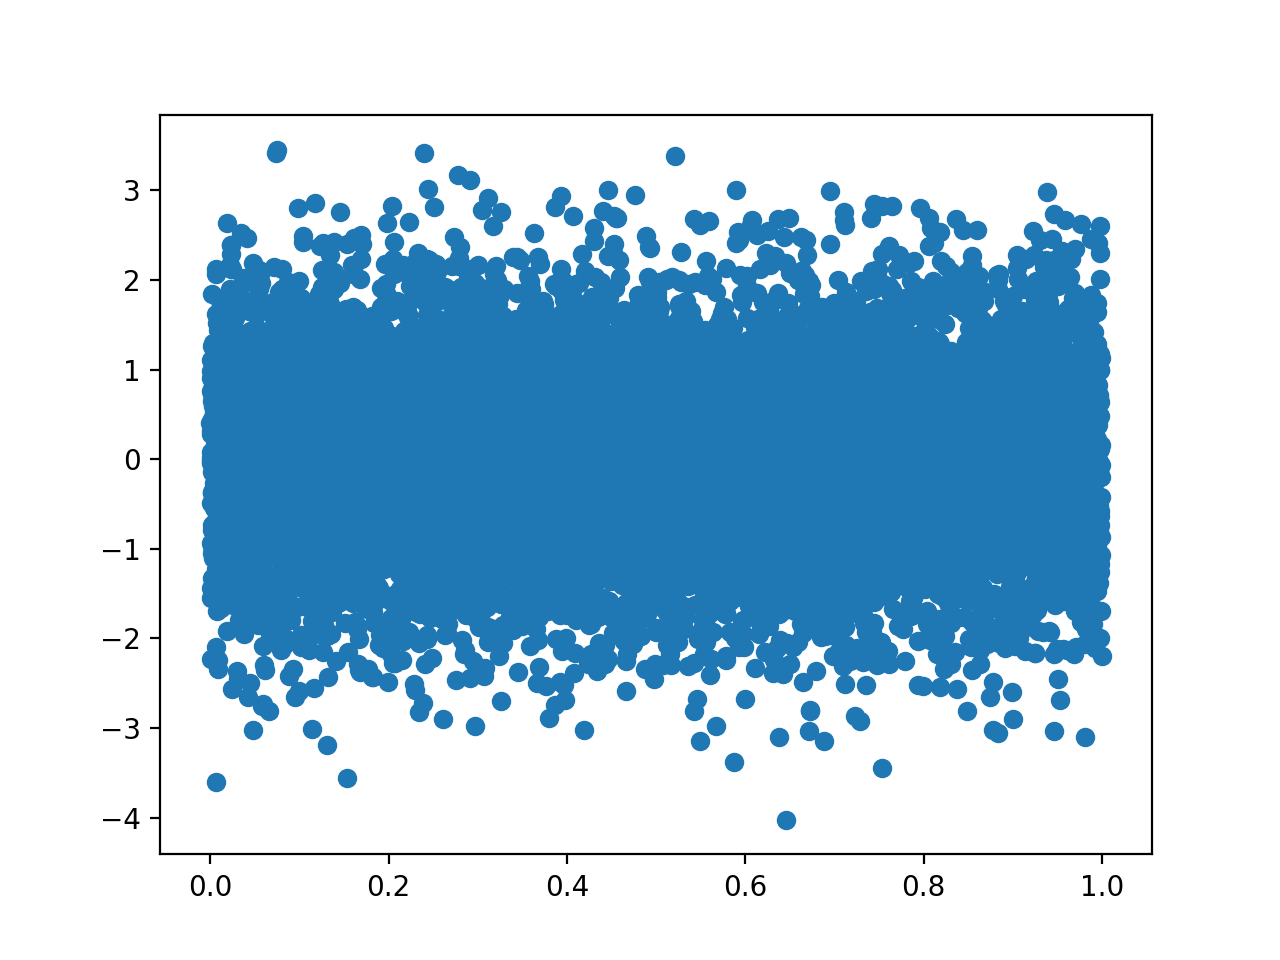

In [11]:
plt.figure()
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
plt.scatter(X,Y)

<IPython.core.display.Javascript object>


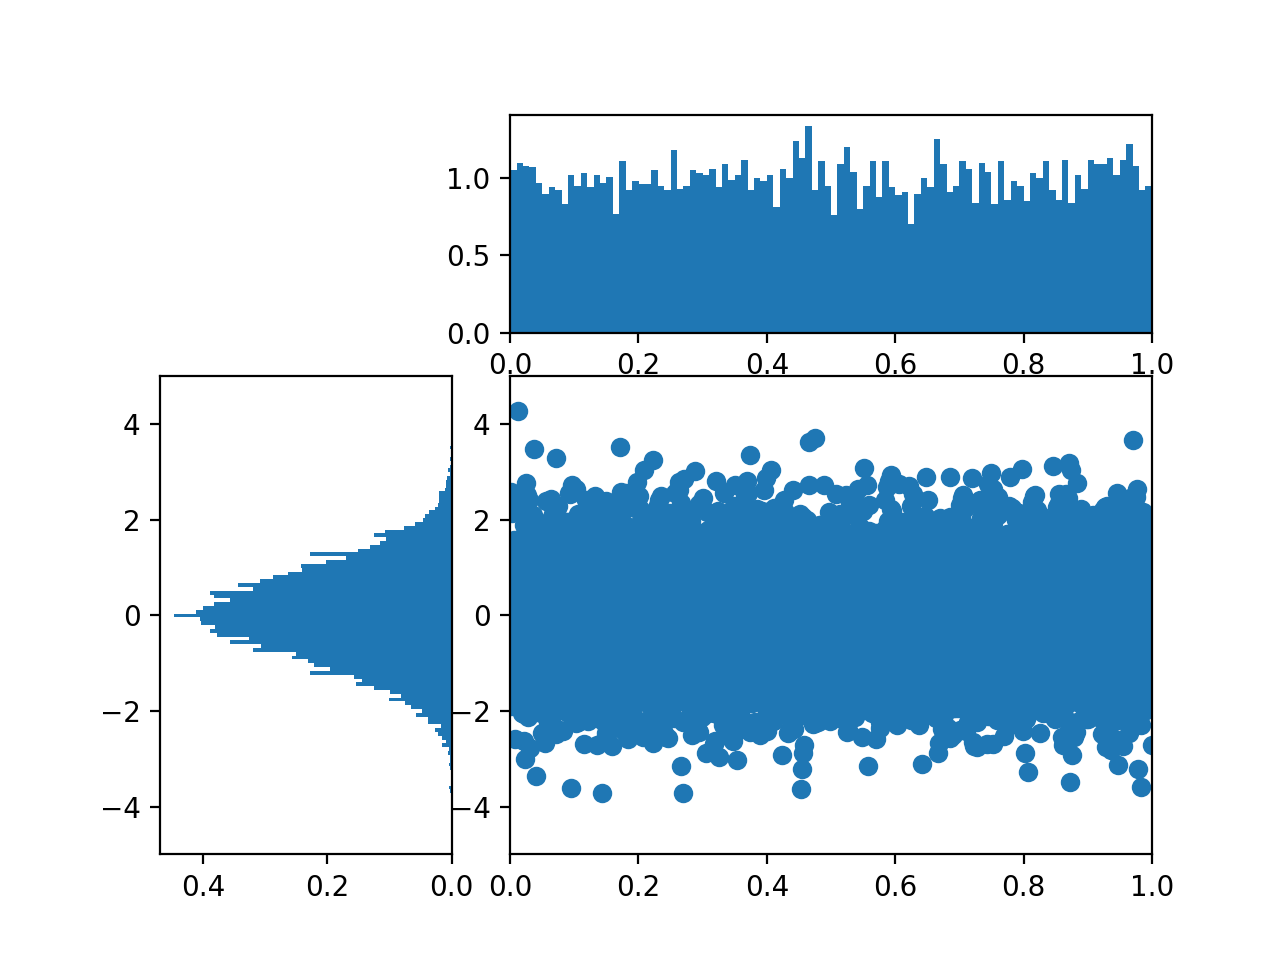

In [12]:
# use gridspec to partition the figure into subplots
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

In [13]:
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
lower_right.scatter(X, Y)
top_histogram.hist(X, bins=100)
s = side_histogram.hist(Y, bins=100, orientation='horizontal')

In [14]:
# clear the histograms and plot normed histograms
top_histogram.clear()
top_histogram.hist(X, bins=100, normed=True)
side_histogram.clear()
side_histogram.hist(Y, bins=100, orientation='horizontal', normed=True)
# flip the side histogram's x axis
side_histogram.invert_xaxis()

In [15]:
# change axes limits
for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 1)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-5, 5)

In [ ]:
%%HTML
<img src='http://educationxpress.mit.edu/sites/default/files/journal/WP1-Fig13.jpg' />

# Box and Whisker Plots

In [16]:
import pandas as pd
normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({'normal': normal_sample, 
                   'random': random_sample, 
                   'gamma': gamma_sample})

In [17]:
df.describe()

,gamma,normal,random
count,10000.000000,10000.000000,10000.000000
mean,1.979571,-0.012556,0.507810
std,1.407983,1.005597,0.289059
min,0.022186,-3.797927,0.000117
25%,0.950810,-0.695027,0.259992
50%,1.661921,-0.018336,0.516839
75%,2.670708,0.667152,0.758680
max,11.505926,3.546363,0.999467


<IPython.core.display.Javascript object>


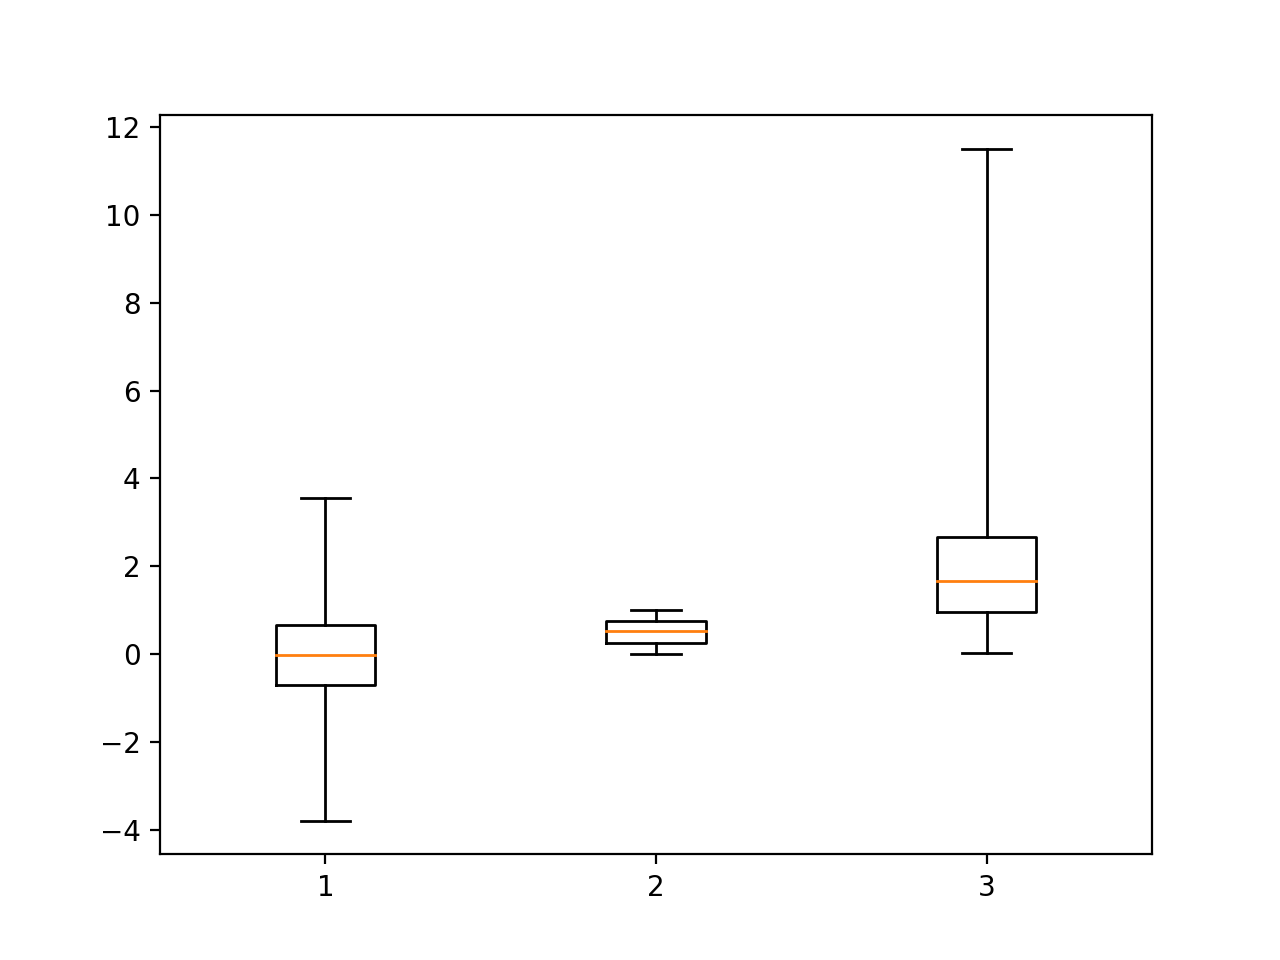

In [18]:
plt.figure()
# create a boxplot of the normal data, assign the output to a variable to supress output
_ = plt.boxplot(df['normal'], whis='range')

In [19]:
# clear the current figure
plt.clf()
# plot boxplots for all three of df's columns
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')

<IPython.core.display.Javascript object>


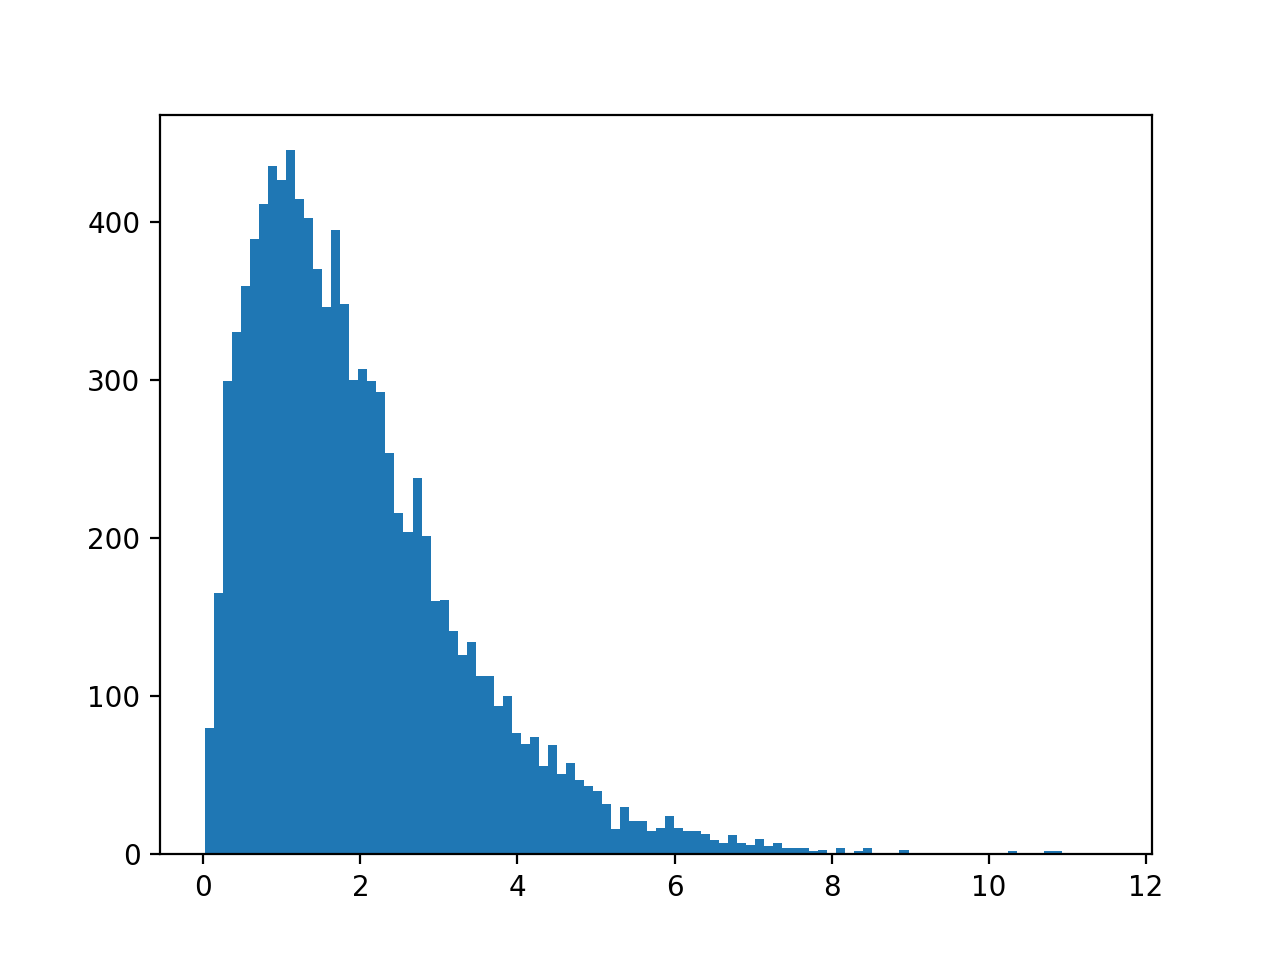

In [20]:
plt.figure()
_ = plt.hist(df['gamma'], bins=100)

<IPython.core.display.Javascript object>


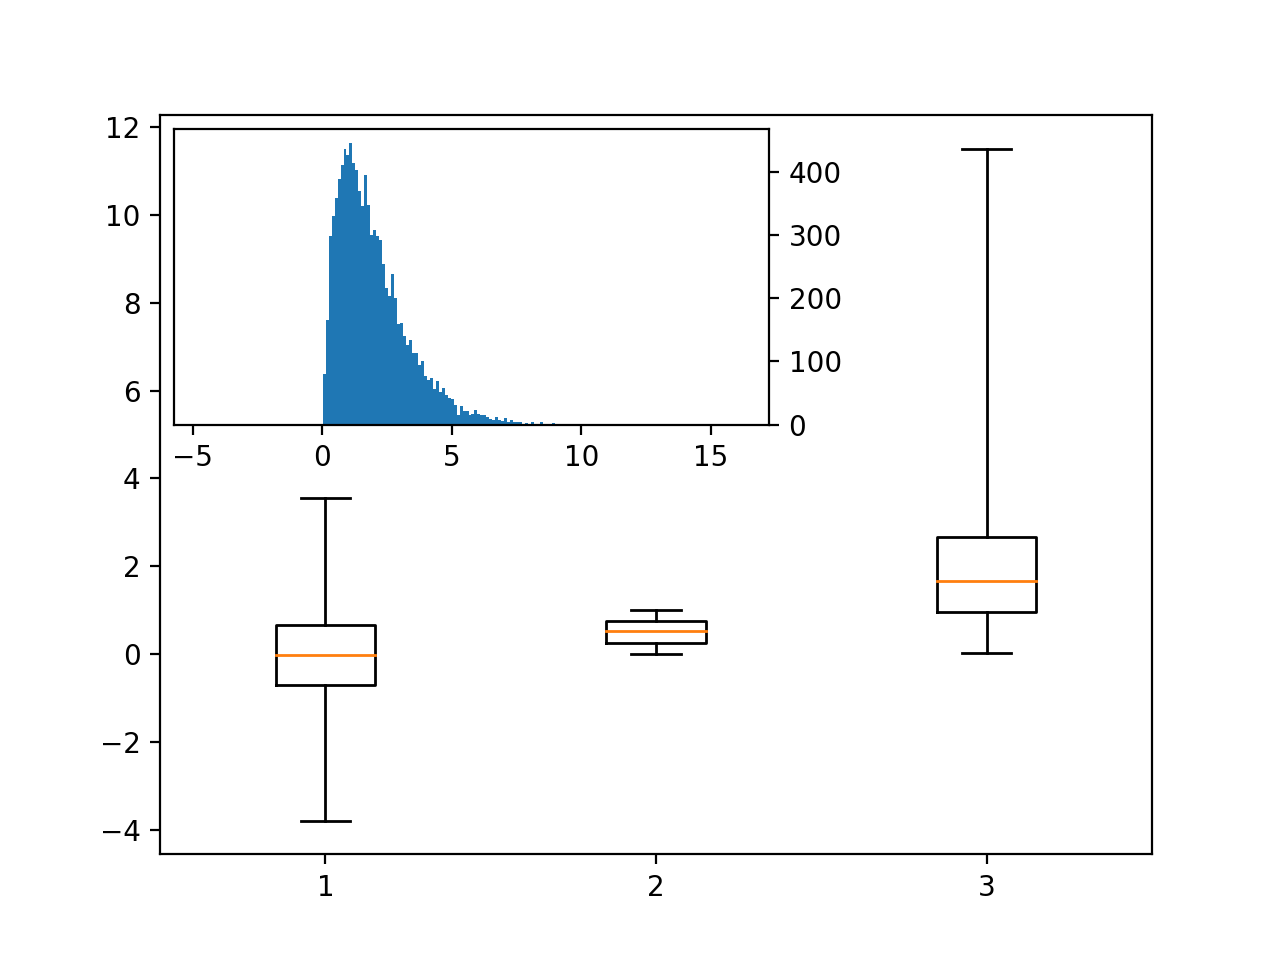

In [21]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

plt.figure()
plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')
# overlay axis on top of another 
ax2 = mpl_il.inset_axes(plt.gca(), width='60%', height='40%', loc=2)
ax2.hist(df['gamma'], bins=100)
ax2.margins(x=0.5)

In [22]:
# switch the y axis ticks for ax2 to the right side
ax2.yaxis.tick_right()

<IPython.core.display.Javascript object>


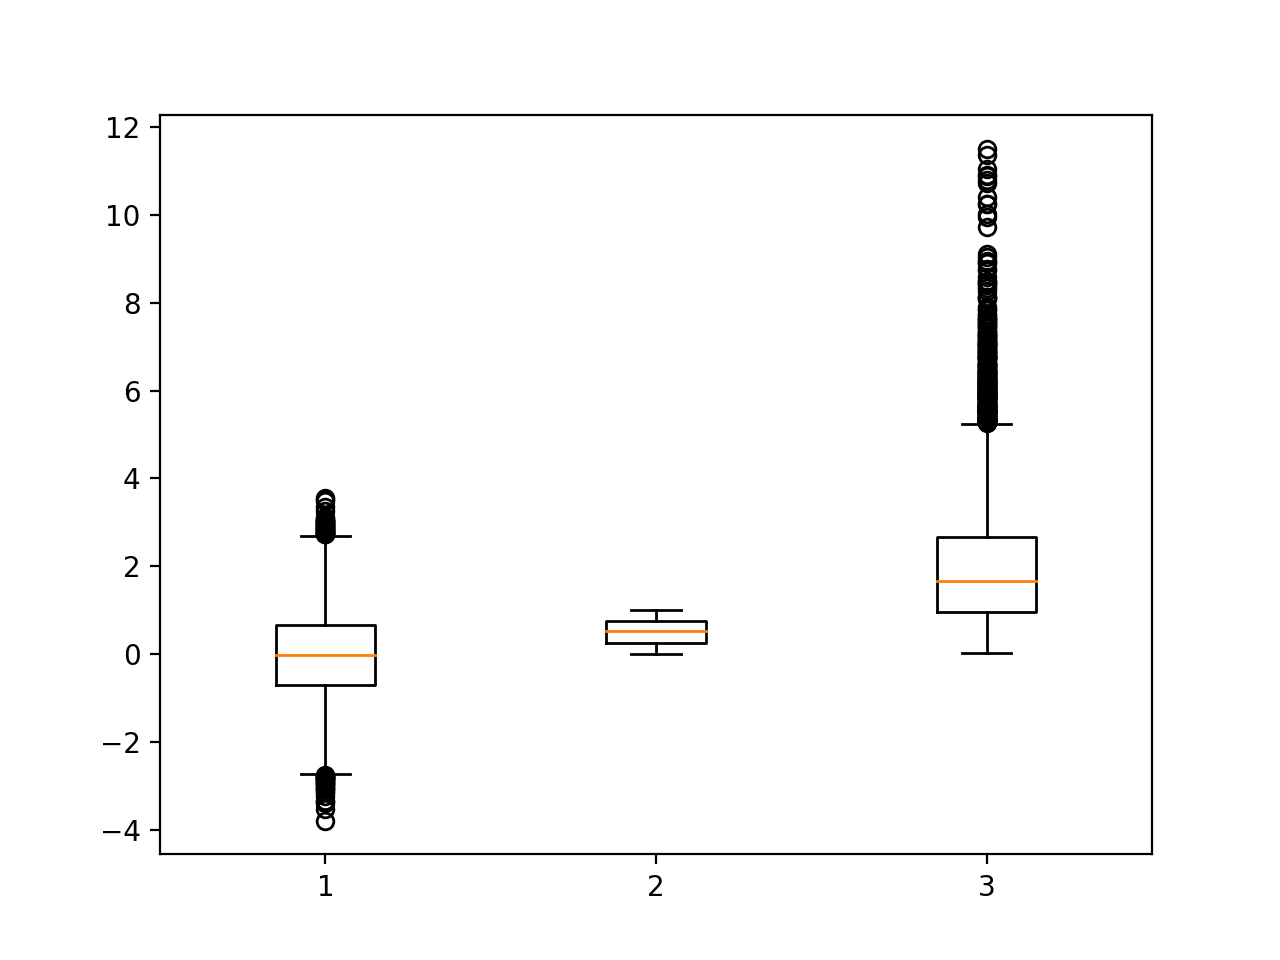

In [23]:
# if `whis` argument isn't passed, boxplot defaults to showing 1.5*interquartile (IQR) whiskers with outliers
plt.figure()
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ] )

# Heatmaps

<IPython.core.display.Javascript object>


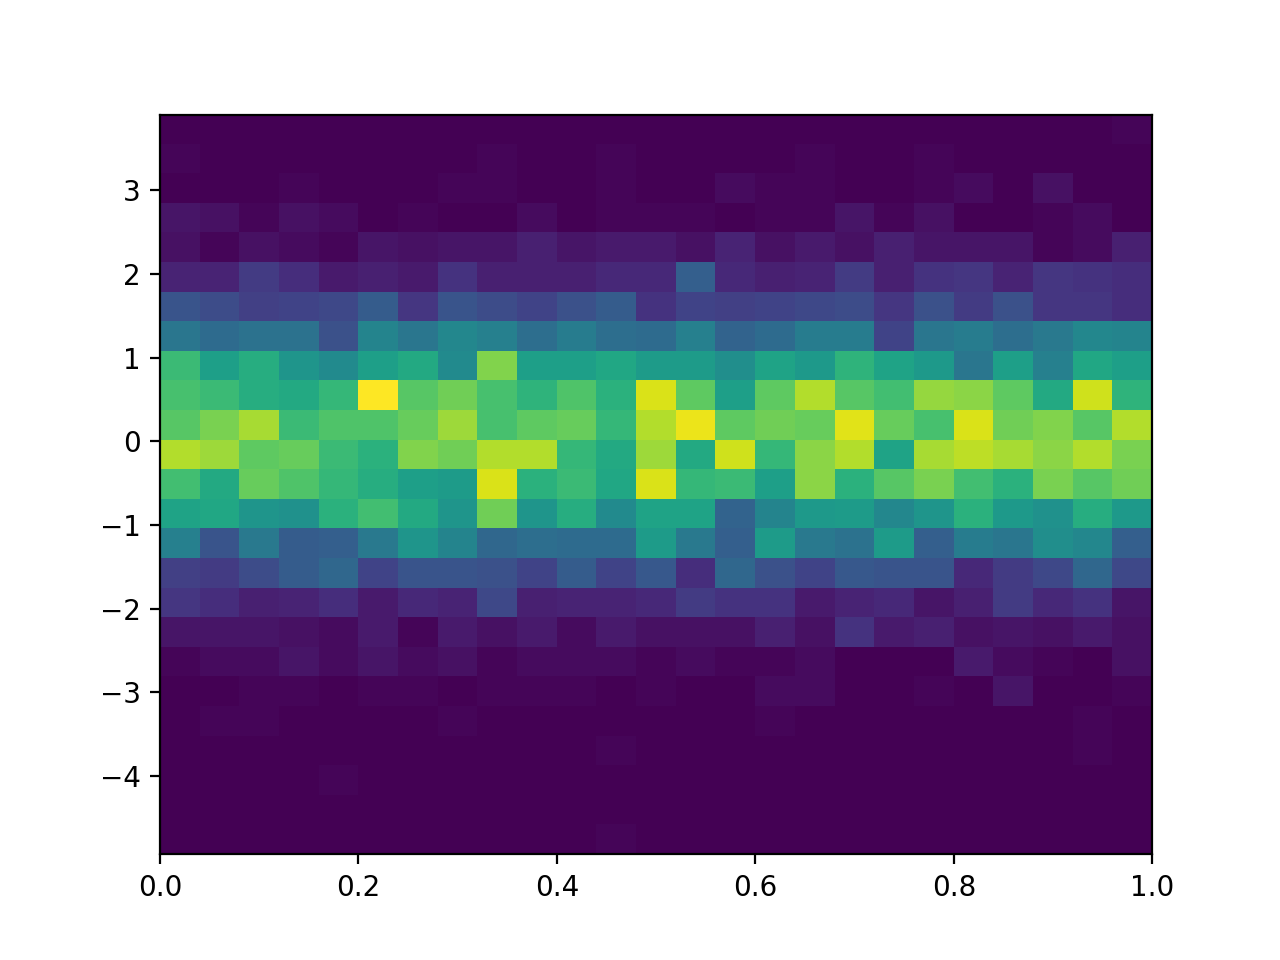

In [24]:
plt.figure()

Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
_ = plt.hist2d(X, Y, bins=25)

<IPython.core.display.Javascript object>


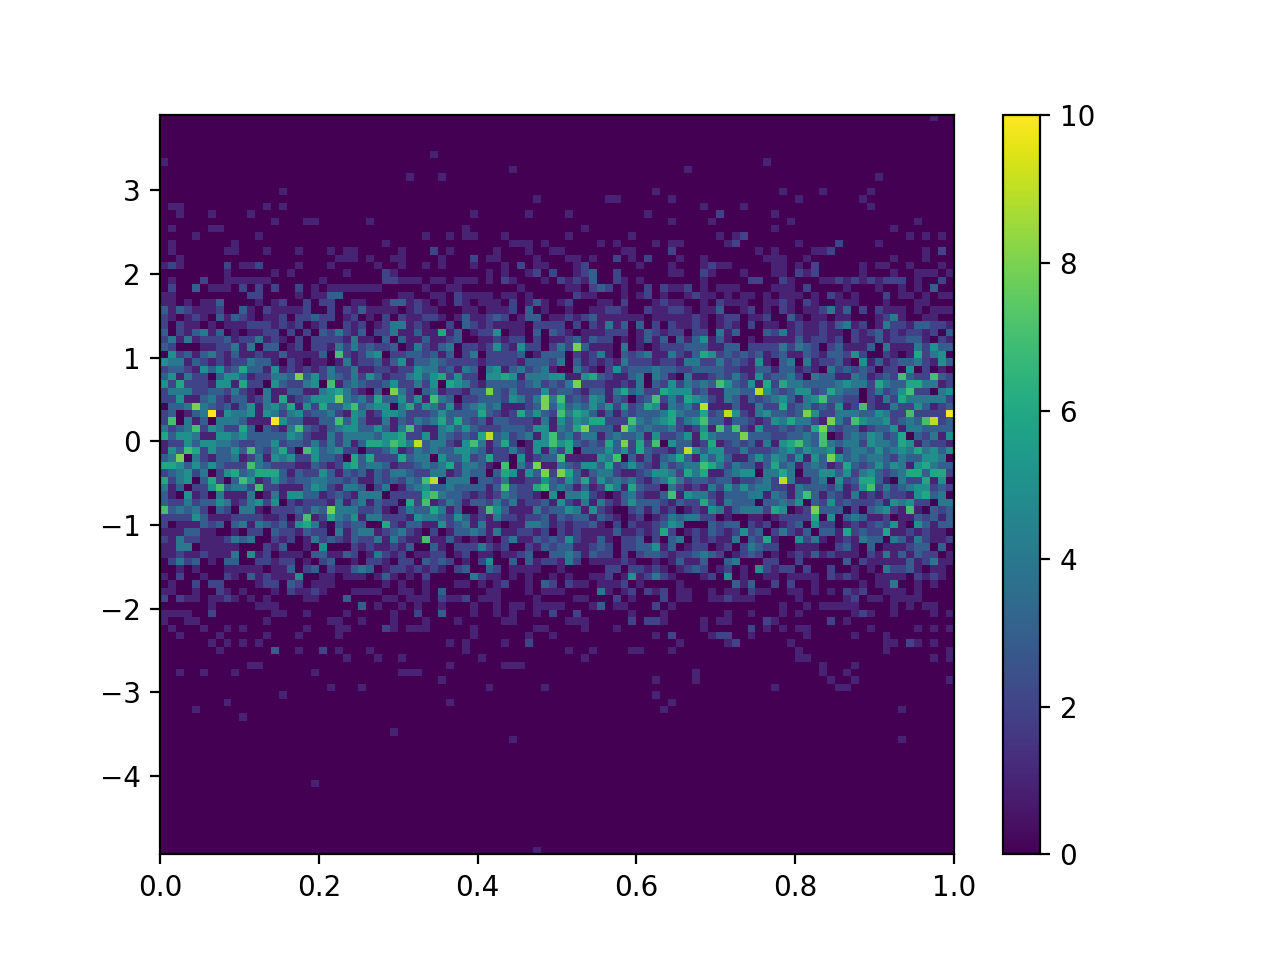

In [25]:
plt.figure()
_ = plt.hist2d(X, Y, bins=100)

In [26]:
# add a colorbar legend
plt.colorbar()

# Animations

In [ ]:
import matplotlib.animation as animation

n = 100
x = np.random.randn(n)

In [ ]:
# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()
    plt.cla()
    bins = np.arange(-4, 4, 0.5)
    plt.hist(x[:curr], bins=bins)
    plt.axis([-4,4,0,30])
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3,27])

In [ ]:
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=100)

# Interactivity

In [ ]:
plt.figure()
data = np.random.rand(10)
plt.plot(data)

def onclick(event):
    plt.cla()
    plt.plot(data)
    plt.gca().set_title('Event at pixels {},{} \nand data {},{}'.format(event.x, event.y, event.xdata, event.ydata))

# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

In [ ]:
from random import shuffle
origins = ['China', 'Brazil', 'India', 'USA', 'Canada', 'UK', 'Germany', 'Iraq', 'Chile', 'Mexico']

shuffle(origins)

df = pd.DataFrame({'height': np.random.rand(10),
                   'weight': np.random.rand(10),
                   'origin': origins})
df

In [ ]:
plt.figure()
# picker=5 means the mouse doesn't have to click directly on an event, but can be up to 5 pixels away
plt.scatter(df['height'], df['weight'], picker=5)
plt.gca().set_ylabel('Weight')
plt.gca().set_xlabel('Height')

In [ ]:
def onpick(event):
    origin = df.iloc[event.ind[0]]['origin']
    plt.gca().set_title('Selected item came from {}'.format(origin))

# tell mpl_connect we want to pass a 'pick_event' into onpick when the event is detected
plt.gcf().canvas.mpl_connect('pick_event', onpick)

In [28]:
%matplotlib notebook
import pandas as pd
import numpy as np

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908


<IPython.core.display.Javascript object>


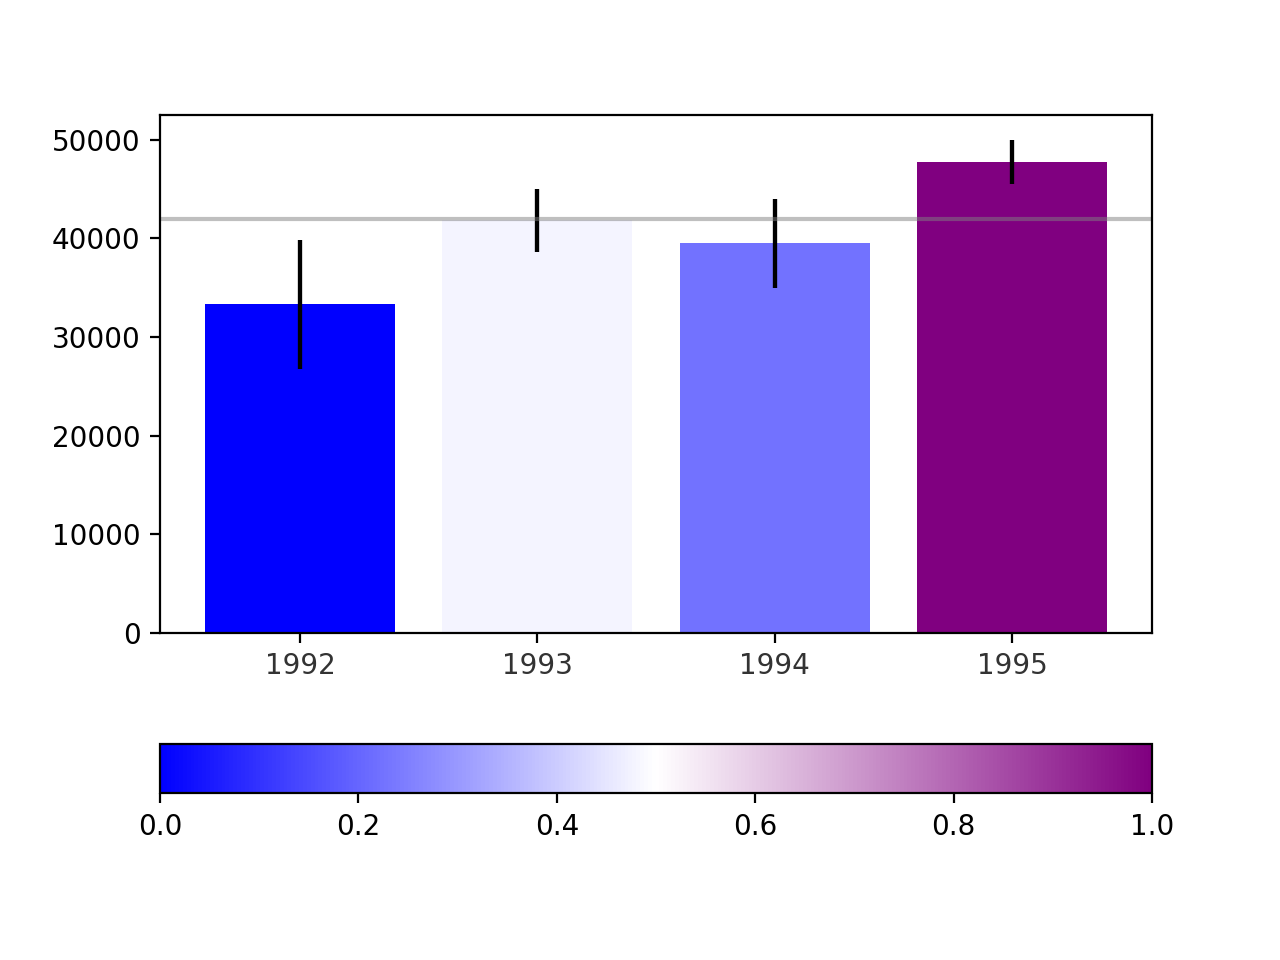

In [29]:
from scipy import stats
year_avg = df.mean(axis = 1)
year_std = df.std(axis = 1)
yerr = year_std / np.sqrt(df.shape[1]) * stats.t.ppf(1-0.05/2, df.shape[1]-1)
import matplotlib.pyplot as plt
plt.figure()
plt.show()
bars = plt.bar(range(df.shape[0]), year_avg, yerr = yerr, color = 'lightslategrey')

In [30]:
yerr, year_avg

(1992    6510.938018
 1993    3193.254844
 1994    4555.329592
 1995    2264.561291
 dtype: float64, 1992    33312.107476
 1993    41861.859541
 1994    39493.304941
 1995    47743.550969
 dtype: float64)

In [31]:
fig = plt.gcf()

In [32]:
threshold=42000
plt.axhline(y = threshold, color = 'grey', alpha = 0.5)

In [33]:
import matplotlib.colors as mcol
import matplotlib.cm as cm

In [34]:

cm1 = mcol.LinearSegmentedColormap.from_list("MyCmapName",["b", "white", "purple"])
cpick = cm.ScalarMappable(cmap=cm1)
cpick.set_array([])
cpick

In [35]:
percentages = []
for bar, yerr_ in zip(bars, yerr):
    low = bar.get_height() - yerr_
    high = bar.get_height() + yerr_
    percentage = (high-threshold)/(high-low)
    if percentage>1: percentage = 1
    if percentage<0: percentage=0
    percentages.append(percentage)
percentages

[0, 0.47836996017248229, 0.22486128520509721, 1]

In [36]:
cpick.to_rgba(percentages)

array([[ 0.        ,  0.        ,  1.        ,  1.        ],
       [ 0.95686275,  0.95686275,  1.        ,  1.        ],
       [ 0.44705882,  0.44705882,  1.        ,  1.        ],
       [ 0.50196078,  0.        ,  0.50196078,  1.        ]])

In [37]:
bars = plt.bar(range(df.shape[0]), year_avg, yerr = yerr, color = cpick.to_rgba(percentages))
plt.colorbar(cpick, orientation='horizontal')

In [38]:
plt.xticks(range(df.shape[0]), df.index, alpha = 0.8)

([<matplotlib.axis.XTick at 0x7fe4e4cde0f0>,
 <a list of 4 Text xticklabel objects>)